<a href="https://colab.research.google.com/github/aniusoro/Uni/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1:
In the previous homework assignment, you were asked to test and plot the following results:
x¯1=15
x¯2=12
s21=8
s22=24
n1=20
n2=10
The plot revealed a potentially serious problem. Conduct a test that is designed to solve this specific problem. Do the conclusions change from what you got when you ran a classic t-test? Specify the name of the test you ran, its test statistic, degrees of freedom, p-value, and 95% confidence interval.

In [ ]:
x1 = 15
x2 = 12
v1 = 8
v2 = 24
n1 = 20
n2 = 10

# I am running a welsch test

# SE
q1_se = sqrt(v1/n1 + v2/n2)
round(q1_se, 3)

# test stat
q1_T = (x1-x2) / q1_se
round(q1_T, 3)

# df
q1 = v1/n1
q2 = v2/n2

q1_df = (q1 + q2)^2 / ((q1^2 / (n1 - 1)) + (q2^2 / (n2 - 1)))
round(q1_df, 3)

# pval
q1_pval = pt(q1_T, df=q1_df, lower.tail = FALSE) * 2
round(q1_pval, 3)

#tcrit
q1_tcrit = qt(0.05/2, df = q1_df, lower.tail = FALSE)
round(q1_tcrit, 3)

# CI
q1_lower = (x1-x2) - (q1_tcrit * q1_se)
q1_upper = (x1-x2) + (q1_tcrit * q1_se)
round(q1_lower, 3)
round(q1_upper, 3)

[1] 1.673

[1] 1.793

[1] 12.091

[1] 0.098

[1] 2.177

[1] -0.643

[1] 6.643

Question 2: 
Responses to stress are governed, in part, by the hypothalamus. Imagine you have two groups of participants. The first shows signs of heart disease and the other does not. You want to determine whether the groups differ (in any direction) in terms of the weight of the hypothalamus.
Use the data “heartDisease.csv” on eClass to determine whether the groups differ based on a classic t-test. Use α=.05. Use of t.test() is not permitted.
Make sure to report:
- the test statistic
- degrees of freedom
- p-value
- Confidence Interval
- whether your reject or fail to reject the H0

In [ ]:
heartData = read.csv("heartDisease.csv")
no_disease = heartData[c(1:11),c(2)]
yes_disease = heartData[c(12:26),c(2)]

#N
N_no = length(no_disease)
N_yes = length(yes_disease)

# Means
M_diff = mean(yes_disease) - mean(no_disease)

#SD
sd_no = sd(no_disease)
sd_yes = sd(yes_disease)

#Var 
no_var = sd_no ^ 2
yes_var = sd_yes ^ 2

# Pooled variance
disease_pvar = ((N_yes - 1)*yes_var + (N_no - 1)*no_var) / (N_yes + N_no - 2)

# Pooled Standard Error
disease_pSE =  sqrt(disease_pvar / N_yes + disease_pvar / N_no)

# test statistic
disease_t = ((M_diff) - 0) / disease_pSE
round(disease_t, 3)

# df
disease_df = N_yes + N_no - 2
disease_df

# pvalue
disease_pval = pt(disease_t, df = disease_df, lower.tail = FALSE) * 2
round(disease_pval, 3)

# alpha
disease_alpha = 0.05

# t_crit
disease_tcrit = qt(disease_alpha/2, df = disease_df, lower.tail = FALSE)

# 95% CI
disease_lower = (M_diff) - disease_tcrit * disease_pSE
disease_upper = (M_diff) + disease_tcrit * disease_pSE
round(disease_lower, 3)
round(disease_upper, 3)

# we fail to reject the null hypothesis

[1] 1.845

[1] 24

[1] 0.077

[1] -0.428

[1] 7.634

Question 3:
Compute an appropriate measure of effect size for the previous question. Use of cohen.d() is not permitted.

In [ ]:
D = M_diff / sqrt(disease_pvar)
round(D, 3)
# this is a large effect

[1] 0.732

Question 4:
Repeat question 2, but use a Welch’s t-test. Use of t.test() is not permitted.

In [ ]:
# test statistic
q4_tstat = (M_diff - 0)/ sqrt((yes_var / N_yes) + (no_var / N_no))
round(q4_tstat, 3)

#q_yes
q_yes = yes_var / N_yes

#q_no
q_no = no_var / N_no

x = (q_yes + q_no) ^ 2
y = (q_yes^2/(N_yes - 1)) + (q_no^2/(N_no - 1))

# df
q4_df = x / y
round(q4_df, 3)

# pval
q4_pval = pt(q4_tstat, df = q4_df, lower.tail = FALSE) * 2
round(q4_pval, 3)

# tcrit
q4_tcrit = qt(p = 0.05/2, df = q4_df)
q4_tcrit

# 95% CI
q4_upper = M_diff - (q4_tcrit * (sqrt((yes_var / N_yes) + (no_var / N_no))))
q4_lower = M_diff + (q4_tcrit * (sqrt((yes_var / N_yes) + (no_var / N_no))))
round(q4_upper, 3)
round(q4_lower, 3)

[1] 1.955

[1] 23.931

[1] 0.062

[1] -2.064214

[1] 7.408

[1] -0.202

Question 5:
Plot the group means with their respective confidence intervals for the heartDisease.csv data.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



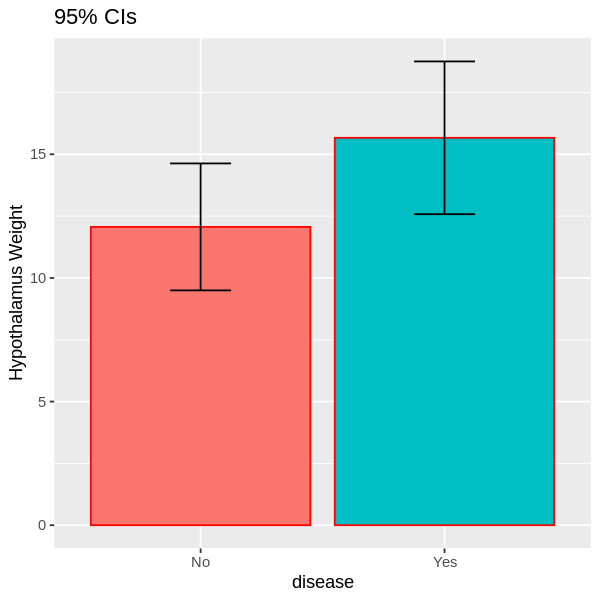

In [ ]:
install.packages("Hmisc")

library(ggplot2)
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(heartData, aes(x = disease, y = hypoWeight)) +
  geom_bar(stat = "summary", fun = mean, 
            aes(fill = disease), colour = "red") +
  ylab("Hypothalamus Weight") +
  geom_errorbar(stat = "summary", 
                fun.data = "mean_cl_normal", 
                fun.args = list(conf.int = 0.95),
                width = 0.25) +
  theme(legend.position = "none") +
  ggtitle("95% CIs")

Question 6:
Repeat question 2 using 20% Trimmed Means. Do you get a different conclusion? Use of yuen() is not permitted.

In [ ]:
install.packages("WRS2")
library(WRS2)
winvar_no = winvar(no_disease, tr = 0.2)
winvar_yes = winvar(yes_disease, tr = 0.2)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# trimmed means
trimmed_no = mean(no_disease, tr = 0.2)
trimmed_yes = mean(yes_disease, tr = 0.2)
trimmed_no
trimmed_yes

# Hj
h_no = N_no - 2 * floor(0.2*N_no)
h_yes = N_yes - 2 * floor(0.2*N_yes)
h_no
h_yes

#Dj 

d_no = ((N_no - 1) * winvar_no) / (h_no*(h_no - 1))
d_yes = ((N_yes - 1) * winvar_yes) / (h_yes*(h_yes - 1))
round(d_no, 3)
round(d_yes, 3)

# Test statistic
q6_Test = ((trimmed_yes - trimmed_no)) / sqrt(d_yes + d_no)
round(q6_Test, 3)

# Degrees of Freedom
a = (d_yes + d_no)^2
b = (d_yes^2 / (h_yes - 1))
c = (d_no^2 / (h_no - 1))

q6_df =  a/(b+c) 
q6_df

# tcrit
q6_tcrit = qt(p = 0.05/2, df = q6_df)
q6_tcrit

# pval
q6_pval = pt(q6_Test, df = q6_df, lower.tail = FALSE) * 2
round(q6_pval, 3)

# CI
q6_lower = (trimmed_yes - trimmed_no) + q6_tcrit * (sqrt(d_yes + d_no))
q6_upper = (trimmed_yes - trimmed_no) - q6_tcrit * (sqrt(d_yes + d_no))
round(q6_lower, 3)
round(q6_upper, 3)

# we get the same conclusion


[1] 11.85714

[1] 14.03333

[1] 7

[1] 9

[1] 1.677

[1] 0.552

[1] 1.458

[1] 9.802916

[1] -2.234226

[1] 0.176

[1] -1.159

[1] 5.512

Question 7:
Plot the group trimmed means with their respective confidence intervals for the heartDisease.csv data using 20% trimming.


In [ ]:
Group = c(no_disease, yes_disease)
M1 = mean(heartData$hypoWeight[1:11], tr = 0.2)
M2 = mean(heartData$hypoWeight[12:26], tr = 0.2)
Mean = c(M1, M2)
se = sqrt(d_no + d_yes)
tcrit = q6_tcrit
MOE = se * tcrit

plotData = data.frame(Group, Mean, MOE)
print(plotData)

   Group     Mean       MOE
1   11.1 11.85714 -3.335663
2   12.2 14.03333 -3.335663
3   15.5 11.85714 -3.335663
4   17.6 14.03333 -3.335663
5   13.0 11.85714 -3.335663
6    7.5 14.03333 -3.335663
7    9.1 11.85714 -3.335663
8    6.6 14.03333 -3.335663
9    9.5 11.85714 -3.335663
10  18.0 14.03333 -3.335663
11  12.6 11.85714 -3.335663
12  18.2 14.03333 -3.335663
13  14.1 11.85714 -3.335663
14  13.8 14.03333 -3.335663
15  12.1 11.85714 -3.335663
16  34.1 14.03333 -3.335663
17  12.0 11.85714 -3.335663
18  14.1 14.03333 -3.335663
19  14.5 11.85714 -3.335663
20  12.6 14.03333 -3.335663
21  12.5 11.85714 -3.335663
22  19.8 14.03333 -3.335663
23  13.4 11.85714 -3.335663
24  16.8 14.03333 -3.335663
25  14.1 11.85714 -3.335663
26  12.9 14.03333 -3.335663


Question 8:
Generate Q-Q plots to assess the normality assumption of the heartDisease.csv data. Should a classic t-test be run on this data?

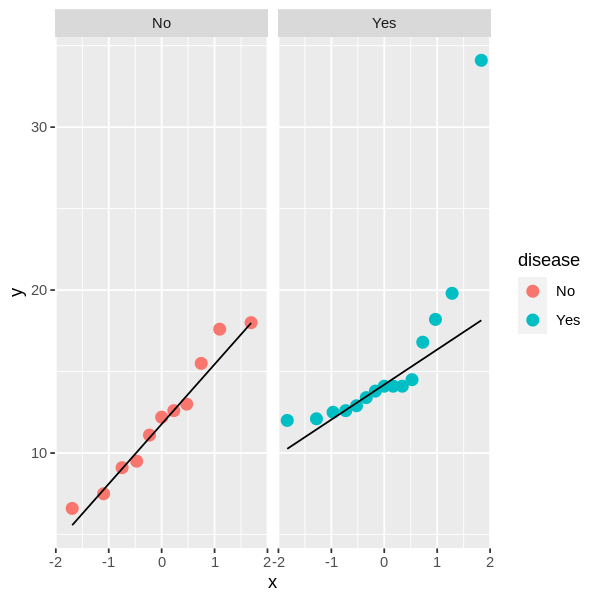

In [ ]:
ggplot(heartData, aes(sample = hypoWeight)) + stat_qq(aes(colour = disease), size = 3) +
      stat_qq_line() +
      facet_wrap(~disease) + scale_fill_brewer(palette="Dark2")

Question 9:
Generate boxplots to assess the homogeneity of variance assumption of the heartDisease.csv data. Is that assumption reasonable? Make the boxplots pretty colours.


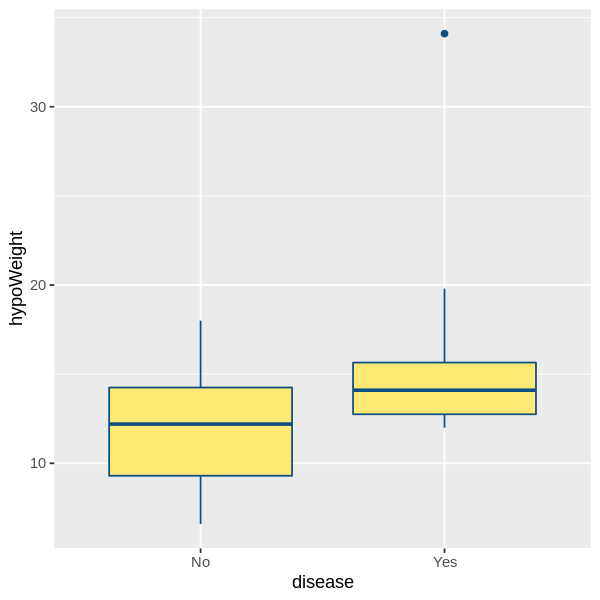

In [ ]:
ggplot(heartData,aes(x = disease, y = hypoWeight)) +
      geom_boxplot(aes(fill = disease), color = "#0D5184", fill = '#FFE874')